In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML
from sklearn.metrics import roc_auc_score

In [281]:
#1. Download the dataset files from Canvas, load them, and prepare the dataset for analysis.
telco_cust_df = pd.read_excel("Telco_customer_churn.xlsx")

In [282]:
#a. Display the first few rows of the dataset to understand its structure.
telco_cust_df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
4732,2592-HODOV,1,United States,California,Brea,92823,"33.924143, -117.79387",33.924143,-117.793870,Male,...,One year,No,Credit card (automatic),19.30,259.65,No,0,66,2823,NaN
228,4315-MURBD,1,United States,California,San Bruno,94066,"37.624436, -122.430661",37.624436,-122.430661,Female,...,Month-to-month,Yes,Bank transfer (automatic),98.90,1120.95,Yes,1,71,5559,Price too high
390,9851-QXEEQ,1,United States,California,Bangor,95914,"39.396585, -121.38029",39.396585,-121.380290,Male,...,Month-to-month,Yes,Electronic check,104.70,4346.4,Yes,1,84,3316,Competitor offered more data
2600,2483-XSSMZ,1,United States,California,Orinda,94563,"37.873916, -122.20522",37.873916,-122.205220,Female,...,One year,Yes,Electronic check,47.85,1886.4,No,0,23,5531,NaN
3590,3113-IWHLC,1,United States,California,Strathmore,93267,"36.141319, -119.129075",36.141319,-119.129075,Male,...,Month-to-month,Yes,Mailed check,55.80,274.35,No,0,69,2612,NaN
3917,3470-OBUET,1,United States,California,San Jose,95123,"37.238758, -121.828375",37.238758,-121.828375,Female,...,Two year,No,Credit card (automatic),74.00,4868.4,No,0,35,4188,NaN
814,9174-FKWZE,1,United States,California,Sacramento,95819,"38.567594, -121.437507",38.567594,-121.437507,Female,...,Month-to-month,Yes,Electronic check,19.45,19.45,Yes,1,78,3848,Limited range of services
2126,8966-SNIZF,1,United States,California,Vista,92083,"33.17494, -117.242761",33.174940,-117.242761,Female,...,Two year,No,Bank transfer (automatic),19.45,1303.5,No,0,57,5540,NaN
6194,6603-YRDCJ,1,United States,California,San Francisco,94124,"37.731505, -122.384532",37.731505,-122.384532,Male,...,Two year,Yes,Mailed check,61.05,2018.4,No,0,21,3215,NaN
5874,9488-FVZCC,1,United States,California,Rialto,92376,"34.109775, -117.378904",34.109775,-117.378904,Female,...,Two year,Yes,Bank transfer (automatic),79.50,5661.7,No,0,78,4390,NaN


## PART 2: Data Preprocessing and Exploration

In [283]:
#Get information about columns and data types.
telco_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Data inspection
From the sample returned and the data information, we can learn that the loan dataset contains 7043 rows and 33 columns. 3 of the columns are floats,61 are integers, 24 are non-numeric(object). From a general inspection, we can also see that we don't have too much missing data.

- CustomerID: Unique identifier for each customer.
- Count: A constant value.
- Country: Country where the customer resides (all entries are 'United States').
- State: State where the customer resides, (all entries are 'California').
- City: City where the customer resides.
- Zip Code: Postal code of the customer’s location.
- Lat Long: Latitude and Longitude coordinates of the customer’s location.
- Latitude: Latitude coordinate of the customer’s location.
- Longitude: Longitude coordinate of the customer’s location.
- Gender: Gender of the customer (Male/Female).
- Senior Citizen: Flag (Yes/No) for if the customer is a senior citizen.
- Partner: Flag (Yes/No) for if the customer has a partner.
- Dependents: Flag (Yes/No) for if the customer has dependents.
- Tenure Months: Number of months the customer has been with the company.
- Phone Service: Flag (Yes/No) for if the customer has phone service.
- Multiple Lines: Flag (Yes/No/No phone service) for if the customer has multiple lines.
- Internet Service: Type of internet service (DSL, Fiber optic, No).
- Online Security: Flag (Yes/No/No internet service) for if the customer has online security service.
- Online Backup: Flag (Yes/No/No internet service) for if the customer has online backup service.
- Device Protection: Flag (Yes/No/No internet service) for if the customer has device protection service.
- Tech Support: Flag (Yes/No/No internet service) for if the customer has tech support service.
- Streaming TV: Flag (Yes/No/No internet service) for if the customer has streaming TV service.
- Streaming Movies: Flag (Yes/No/No internet service) for if the customer has streaming movies service.
- Contract: Type of contract (Month-to-month, One year, Two year).
- Paperless Billing: Flag (Yes/No) for if the customer has paperless billing.
- Payment Method: Method of payment (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- Monthly Charges: The amount charged to the customer monthly.
- Total Charges: The total amount charged to the customer.
- Churn Label: Flag (Yes/No) for if the customer churned.
- Churn Value: Binary value for churn (0 = No, 1 = Yes).
- Churn Score: Score indicating the likelihood of churn (higher score indicates higher likelihood).
- CLTV: Customer Lifetime Value.
- Churn Reason: Reason for churn (filled for customers who churned, null for customers who didn't).

From the output above, we notice that the Total Charges is considered a non-numerical column(object) where it should contain numerical values. Hence, we'll convert this to a numeric column. We can also see that columns like Online Security, Online Backup; have both No and other variants of No. We'll change this to just 'No'.


### a. Clean the dataset by handling missing values, outliers, and inconsistent data.

In [284]:
#convert to numeric.
telco_cust_df['Total Charges'] = pd.to_numeric(telco_cust_df['Total Charges'], errors='coerce')

In [285]:
#change variants of 'No' to just 'No' to maintain consistency.
inconsistent_columns = ['Multiple Lines','Online Security','Online Backup', 'Device Protection','Tech Support','Streaming TV', 'Streaming Movies']
for i in inconsistent_columns:
    telco_cust_df.loc[~telco_cust_df[i].isin(['No', 'Yes']), i] = 'No' #change anything that is not a Yes and No to No for values like 'No Internet Service' and 'No Phone Service'.

In [286]:
#run .info() again to confirm our formatting.
telco_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [287]:
#check for duplicates.
duplicate_rows = telco_cust_df.duplicated().sum()
duplicate_rows

0

The dataset contain no duplicates.

In [288]:
#check for missing values.
telco_cust_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Here, we can see that only two columns have missing values. Churn Reason and Total Charges. Let's understand their distribution below.

In [289]:
#understand churn reason distribution to determine how to handle its missing values.
telco_cust_df[['Churn Label', 'Churn Reason']].sample(n=10)

,Churn Label,Churn Reason
6262,No,NaN
4866,No,NaN
1209,Yes,Competitor offered more data
3749,No,NaN
5963,No,NaN
4322,No,NaN
2980,No,NaN
3197,No,NaN
3282,No,NaN
2,Yes,Moved


Here, we can see that only rows with Churn Label set to Yes have Churn Reason. Let's try to understand the count.

In [290]:
telco_cust_df['Churn Label'].value_counts() #to understand the count of the values of Churn Label.

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

As can be seen from this result, over 70% of the records have no Churn Reason since their Churn Label is No. Hence, we won't use Churn Reason column for our analysis and I'll drop it later. Total Charges on the other hand, has 11 missing values. There is the option to delete them since the number is not very significant, but on a closer inspection, we can see that the Total Charges is roughly the product of the Monthly Charge and the Tenure Months. We can see this relationship below.

In [291]:
telco_cust_df['Temp_Tenure_Product'] = telco_cust_df['Monthly Charges'] * telco_cust_df['Tenure Months'] #product of the tenure months and monthly charges.
telco_cust_df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Temp_Tenure_Product']]

,Tenure Months,Monthly Charges,Total Charges,Temp_Tenure_Product
0,2,53.85,108.15,107.7
1,2,70.70,151.65,141.4
2,8,99.65,820.50,797.2
3,28,104.80,3046.05,2934.4
4,49,103.70,5036.30,5081.3
...,...,...,...,...
7038,72,21.15,1419.40,1522.8
7039,24,84.80,1990.50,2035.2
7040,72,103.20,7362.90,7430.4
7041,11,29.60,346.45,325.6


Therefore, we can apply the same calculation to fill the 11 missing values.

In [292]:
telco_cust_df['Temp_Total_Charges'] = telco_cust_df['Tenure Months'] * telco_cust_df['Monthly Charges']
telco_cust_df['Total Charges'] = telco_cust_df['Total Charges'].fillna(telco_cust_df['Temp_Total_Charges'])

In [293]:
#confirm that our filling with the product of Monthly Charges and Tenure Months worked.
telco_cust_df.isnull().sum()

CustomerID                0
Count                     0
Country                   0
State                     0
City                      0
Zip Code                  0
Lat Long                  0
Latitude                  0
Longitude                 0
Gender                    0
Senior Citizen            0
Partner                   0
Dependents                0
Tenure Months             0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection         0
Tech Support              0
Streaming TV              0
Streaming Movies          0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charges           0
Total Charges             0
Churn Label               0
Churn Value               0
Churn Score               0
CLTV                      0
Churn Reason           5174
Temp_Tenure_Product       0
Temp_Total_Charges        0
dtype: int64

Now we can see that all missing values have been handled.

In [294]:
#find out which columns are not useful for our analysis and remove them.
telco_cust_df.nunique()

CustomerID             7043
Count                     1
Country                   1
State                     1
City                   1129
Zip Code               1652
Lat Long               1652
Latitude               1652
Longitude              1651
Gender                    2
Senior Citizen            2
Partner                   2
Dependents                2
Tenure Months            73
Phone Service             2
Multiple Lines            2
Internet Service          3
Online Security           2
Online Backup             2
Device Protection         2
Tech Support              2
Streaming TV              2
Streaming Movies          2
Contract                  3
Paperless Billing         2
Payment Method            4
Monthly Charges        1585
Total Charges          6531
Churn Label               2
Churn Value               2
Churn Score              85
CLTV                   3438
Churn Reason             20
Temp_Tenure_Product    6051
Temp_Total_Charges     6051
dtype: int64

From this, we can see that there are columns that are not useful for our analysis and will be removed:
- CustomerID has high cardinality as there is a unique value for each customer, hence, it adds no information.
- Count, Country and State have low cardinality as all rows have same value, therefore they will be dropped.
- Lat Long: adds no information cause there is a separate column for each of them.
- Zip Code, City, CLTV, Churn Value, Churn Score will be removed as they are not necessary for the analysis.
- Churn Reason is only for churned customers.

In [295]:
#c. Summary statistics for numerical columns. 
telco_cust_df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Temp_Tenure_Product,Temp_Total_Charges
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755,2279.581350,2279.581350
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152,2264.729447,2264.729447
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000,394.000000,394.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000,1393.600000,1393.600000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000,3786.100000,3786.100000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000,8550.000000,8550.000000


1. The dataset contains 7,043 customer records.
2. The geographical range of customers spans from approximately 32.56° to 41.96° latitude and -124.30° to -114.19° longitude, suggesting a wide coverage area.

3. The average tenure is about 32 months, with a standard deviation of 24.5 months.
4. Tenure ranges from 0 to 72 months, indicating a mix of new and long-term customers.
5. The churn rate is approximately 26.5%.
6. Churn Score ranges from 5 to 100, with an average of 58.7, suggesting a moderate overall churn risk.

7. The average monthly charge is $64.76.
8. Monthly charges range from $18.25 to $118.75.
9. 50% of customers pay between $35.50 and $89.85 per month in monthly charges.
10. Average of total charges is $2,279.73.
11. Total charges range from $0 to $8,684.80.
12. High standard deviation of total charges is $2,266.79, and it indicates significant variability.

### b. Exploratory Data Analysis
Here, we'll view the general churn rate and then how factors like location, gender, internet service, churn reason, etc., affect the churn rate and how they are distributed.

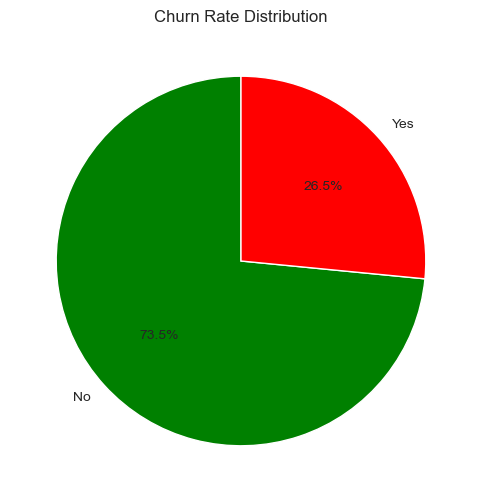

In [296]:
#calculate the churn rate.
churn_counts = telco_cust_df['Churn Label'].value_counts()

#plot the pie chart.
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Churn Rate Distribution')
plt.show()

From this, we can see that 26.5% of the customers have stopped using the company's services. It's in the company's best interests to further reduce this percentage. Let's see the different reasons customer give for leaving the company or changing to another service.

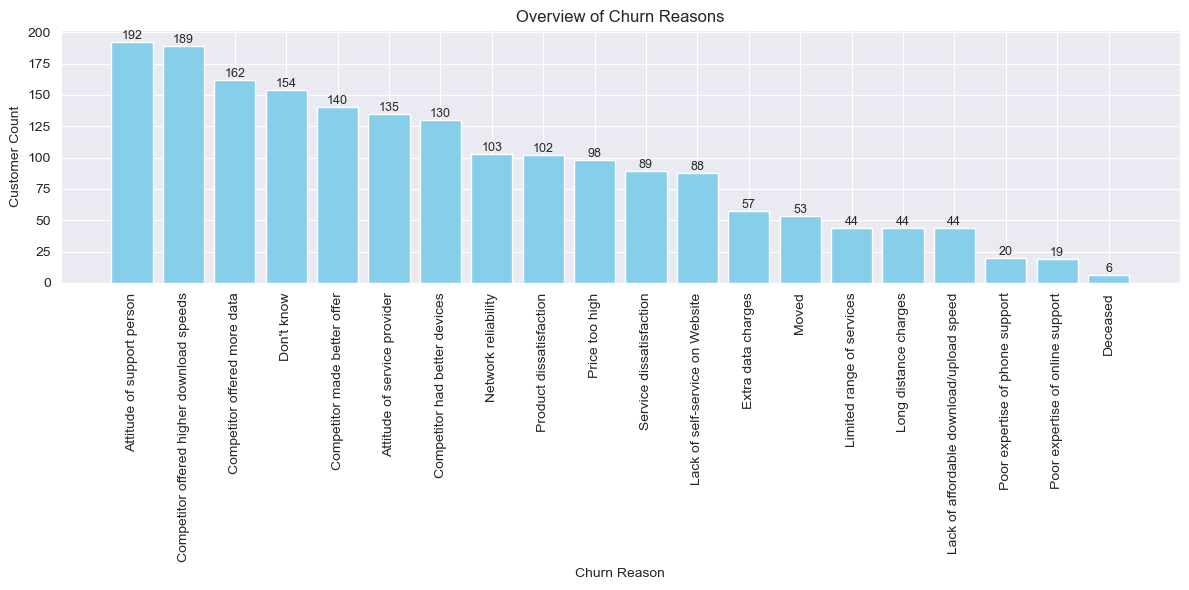

In [297]:
#count the frequency of each churn reason.
churn_reason_counts = telco_cust_df['Churn Reason'].value_counts()

#plot the bar chart.
plt.figure(figsize=(12, 6))
bars = plt.bar(churn_reason_counts.index, churn_reason_counts.values, color='skyblue')

#annotate the bars with the counts.
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar.get_height(),  # Y-coordinate: Top of the bar
        str(bar.get_height()),  # Text to display (the height/count)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=9  # Font size for better readability
    )

#customize the chart.
plt.xticks(rotation=90)
plt.title('Overview of Churn Reasons')
plt.xlabel('Churn Reason')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

Here, we can see 135 and 192 of the customers cite Attitude of support person and Attitude of service provider as their reasons for leaving. This number represents 2 out of the top 7 churn reasons. This suggests that the company needs to improve customer support as it is a major factor in customers leaving. 4 out of the top 7 reasons cite competitor advantages in terms of higher download speeds, more data, better offer and better devices. This is a wake-up call to the company to monitor their competitors so that they can stay on top the competition and also improve the quality of their products. The reset of the reasons show that the company needs to improve their services in general and make adjustments in prices.

Next, let us see if there is any relationship between the customers' gender and churn rate.

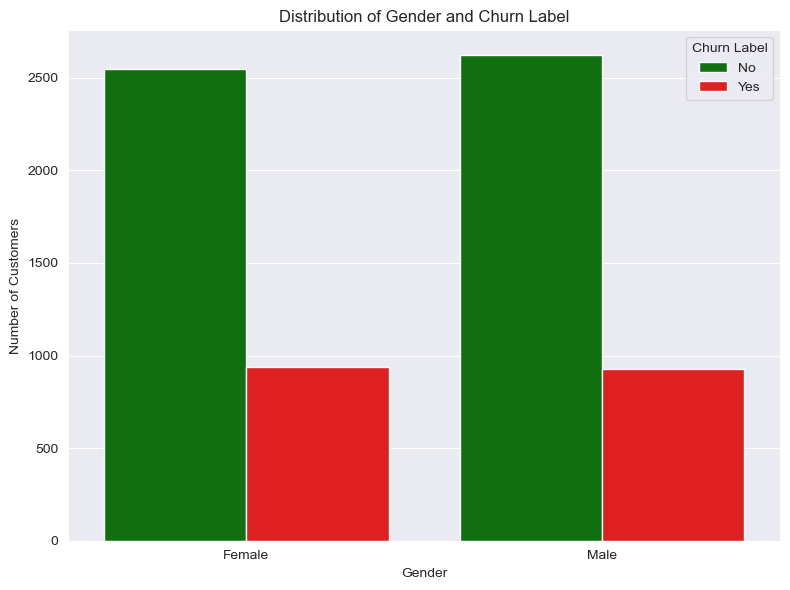

In [298]:
#count occurrences of Gender and Churn Label.
gender_churn_counts = telco_cust_df.groupby(['Gender', 'Churn Label'])['CustomerID'].count().reset_index()
#rename columns for clarity.
gender_churn_counts.columns = ['Gender', 'Churn Label', 'Count']
#plot a grouped bar chart.
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_churn_counts, x='Gender', y='Count', hue='Churn Label', palette=['green', 'red'])

plt.title('Distribution of Gender and Churn Label')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label')
plt.tight_layout()
plt.show()

Here, the difference between the two genders is insignificant, which suggests that there is no correlation between churn and gender. Next. Let's see if there is any correlation between Churn rate and customer age (Senior Citizen or not).

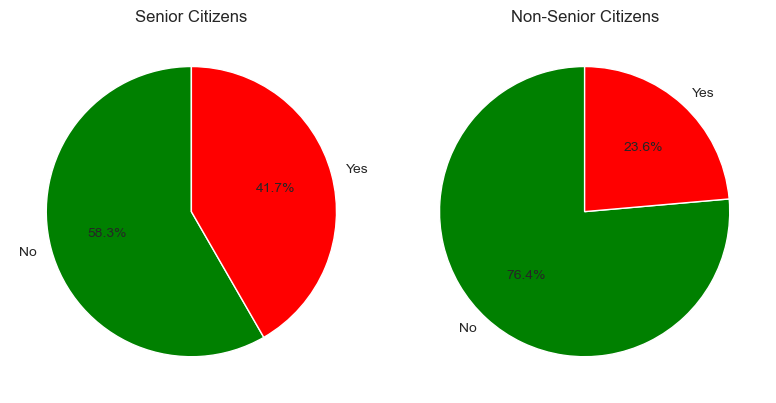

In [299]:
#group data by Senior Citizen and Churn Label.
churn_age_distribution = telco_cust_df.groupby(['Senior Citizen', 'Churn Label'])['CustomerID'].count().reset_index()
churn_age_distribution.columns = ['Senior Citizen', 'Churn Label', 'Count']

#split data by Senior Citizen churn rate.
senior_citizen_data = churn_age_distribution[churn_age_distribution['Senior Citizen'] == 'Yes']
non_senior_citizen_data = churn_age_distribution[churn_age_distribution['Senior Citizen'] == 'No']

senior_values = senior_citizen_data['Count']
senior_labels = senior_citizen_data['Churn Label']
non_senior_values = non_senior_citizen_data['Count']
non_senior_labels = non_senior_citizen_data['Churn Label']

#plot side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

axes[0].set_title('Senior Citizens')
axes[1].set_title('Non-Senior Citizens')

#Senior Citizens.
axes[0].pie(
    senior_values,
    labels=senior_labels,
    autopct='%1.1f%%',
    colors=['green', 'red'], 
    startangle=90
)

#Non-Senior Citizens.
axes[1].pie(
    non_senior_values,
    labels=non_senior_labels,
    autopct='%1.1f%%',
    colors=['green', 'red'],  
    startangle=90
)

plt.tight_layout()
plt.show()


From this, we can see that the churn rate for Senior Citizens is almost twice that of non-Senior Citizens, which seems to suggest that as customers get older, they tend to be less tolerant of deficiencies in services that they use.  The company should intensify efforts to appeal to this customer base. Next, let's look at the correlation between Churn rate and the different services (categorical columns) we have.

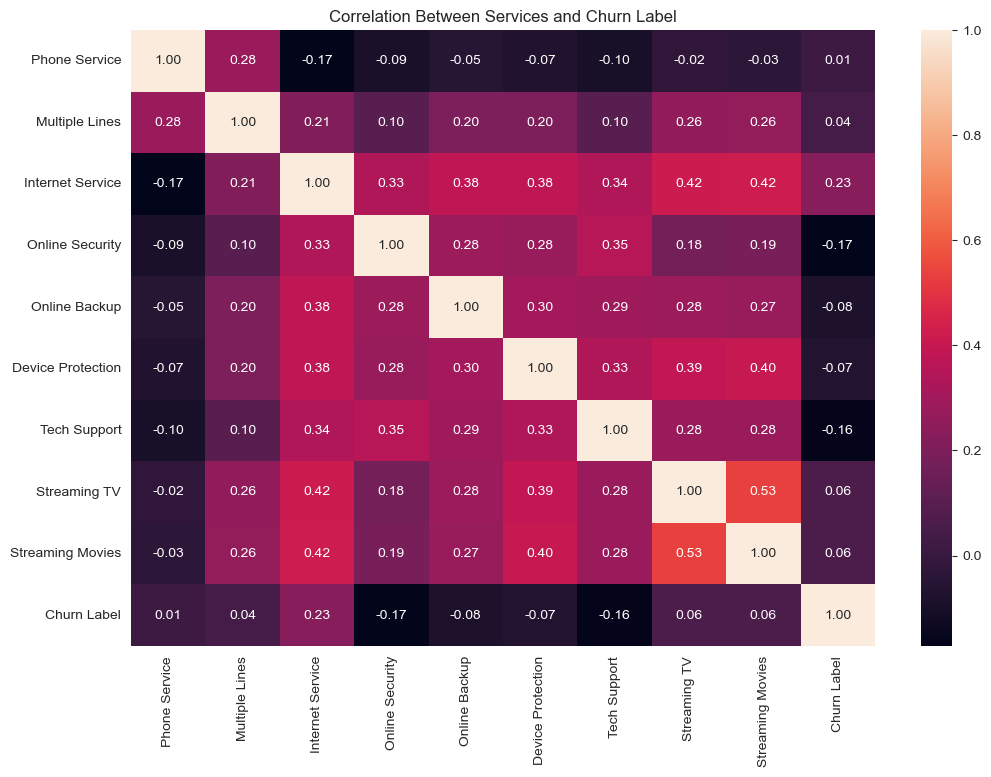

In [300]:

#list of available categorical services.
categorical_services = ['Phone Service','Multiple Lines','Internet Service','Online Security', 'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']
#encode services as numeric values.
telco_cust_df_temp = telco_cust_df.copy() #make a copy because we don't want to modify the original dataframe.
for col in categorical_services:
    telco_cust_df_temp[col] = telco_cust_df_temp[col].map({'Yes': 1, 'DSL': 1, 'Fiber optic': 1, 'No': 0})

#encode Churn Label as well: (1 for Churn, 0 for No Churn).
telco_cust_df_temp['Churn Label'] = telco_cust_df_temp['Churn Label'].map({'Yes': 1, 'No': 0})

#calculate correlations.
correlation_matrix = telco_cust_df_temp[categorical_services + ['Churn Label']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True)
plt.title('Correlation Between Services and Churn Label')
plt.show()


From this heatmap, we can deduce the following:
- Churn rate is inversely correlated with services like 'Online Security', 'Tech support', 'Device Protection', and 'Online Backup' which suggests that customers with these services are less likely to churn. 
- Services like Streaming TV, Streaming Movies, Phone Service, and Multiple Lines show weak correlations with Churn Label, which suggests that these services have zero or minimal impact on Churn rate.
- There is generally very low correlation between Churn rate and the services, which suggests that these services do not particularly predict churn.
- It is also noted that the diagonal values are all 1.00, which means that the services are well correlated with each other.
- Services like Streaming TV and Streaming Movies show high correlation with each other, which suggests that customers usually use these services together.
- There is a slight positive correlation between Churn rate and Internet Service which suggests that customers with this service have a higher chance of churn.

Next, let's look at the relationship between churn rate and the customer's contract type.

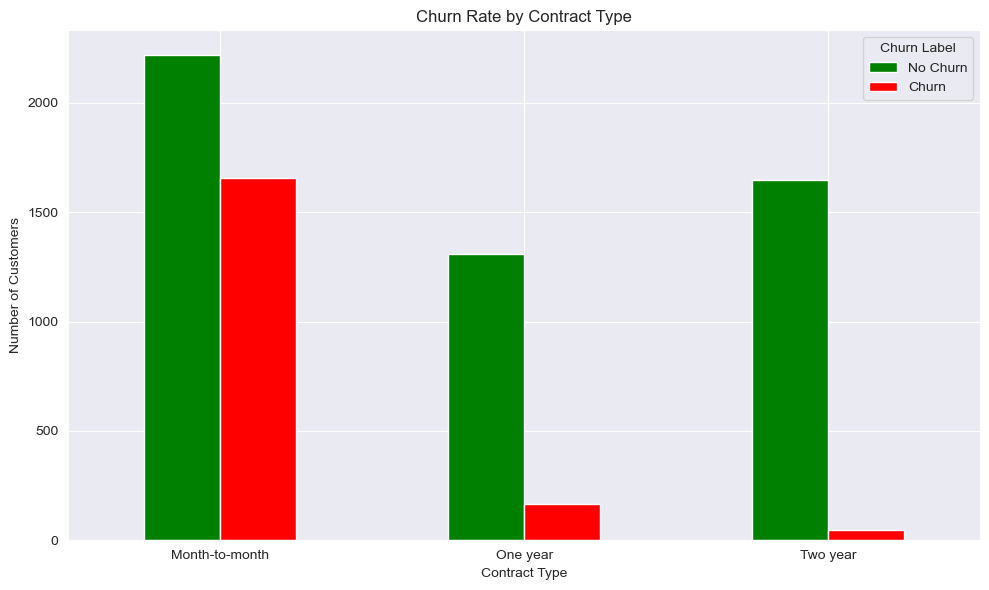

In [301]:
#group data by Contract and Churn Label.
contract_churn = telco_cust_df.groupby(['Contract', 'Churn Label'])['CustomerID'].count().unstack().fillna(0)

#plot bar chart.
contract_churn.plot(kind='bar', color=['green', 'red'], figsize=(10, 6))
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', labels=['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Here, we can see that of the customers who have churned, over 2000 of them are on a month-to-month plan. Let us take a look at the distribution of the contract and the total number of customers to better understand this impact.


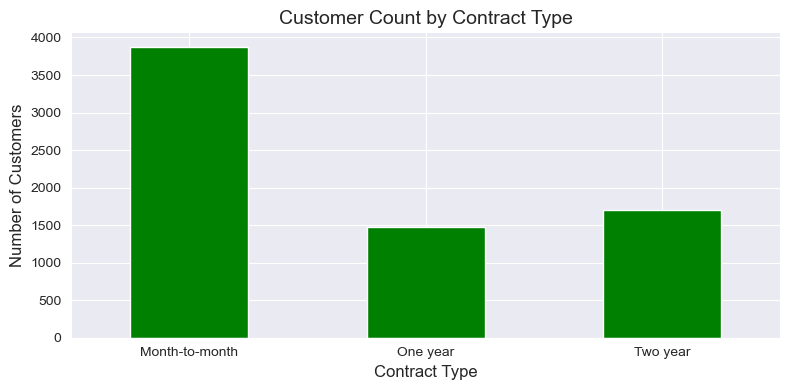

In [302]:
#group data by Contract.
contract_counts = telco_cust_df.groupby('Contract')['CustomerID'].count()

plt.figure(figsize=(8, 4))
contract_counts.plot(kind='bar', color='green')

plt.title('Customer Count by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Here, we can see that over 3500 of the 7000 customers use Month-to-month plan. Coupled with the earlier plot where more than 2000 number of customers in churn shows that there might be a factor with the Month-to-month plan type that is causing the churn and the company is better off investigating this and most probably market the one year and two year plans to these customers.

Next, we'll visualize whether having a partner or not affects churn rate.

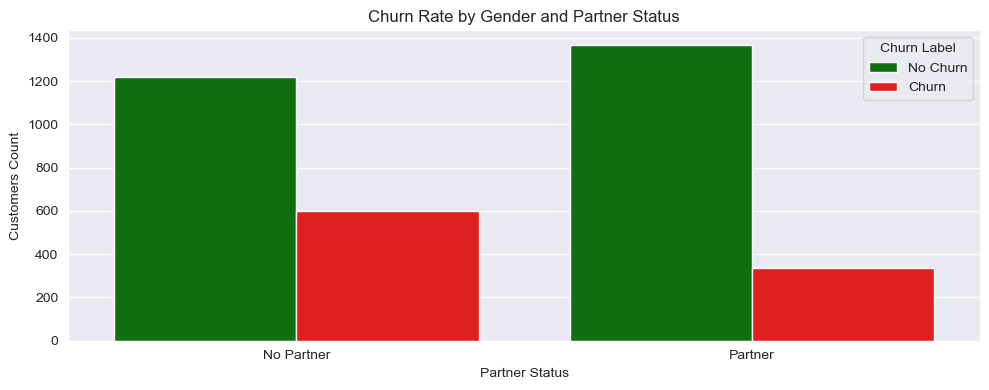

In [303]:

#group data by Gender, Partner status, and Churn Label.
gender_partner_churn = telco_cust_df.groupby(['Gender', 'Partner', 'Churn Label'])['CustomerID'].count().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(
    data=gender_partner_churn,
    x='Partner',
    y='CustomerID',
    hue='Churn Label',
    palette=['green', 'red'],
    errorbar=None
)

plt.title('Churn Rate by Gender and Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Customers Count')
plt.legend(title='Churn Label', labels=['No Churn', 'Churn'])
plt.xticks([0, 1], ['No Partner', 'Partner'])  # Replace 'Yes'/'No' for clarity
plt.tight_layout()
plt.show()


From this, both female and male who do not have a partner are more likely to churn. This suggests that men and women with partners are more tolerant of a inefficient service or are more patient. This company can then focus their marketing efforts on men and women without partners.


Next, we'll visualize whether the payment method used by the customers affect their churn rate.

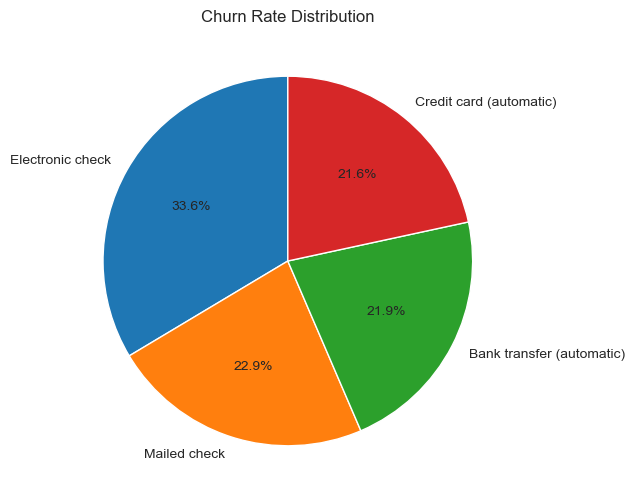

In [304]:
p_count = telco_cust_df['Payment Method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(p_count, labels=p_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate Distribution')
plt.show()

Here, we can see that the most popular payment method was Electronic check, taking up 33.6% of the total, and Credit Card coming in last with 21.6%. Now, let's see how this affects churn rate, if at all.

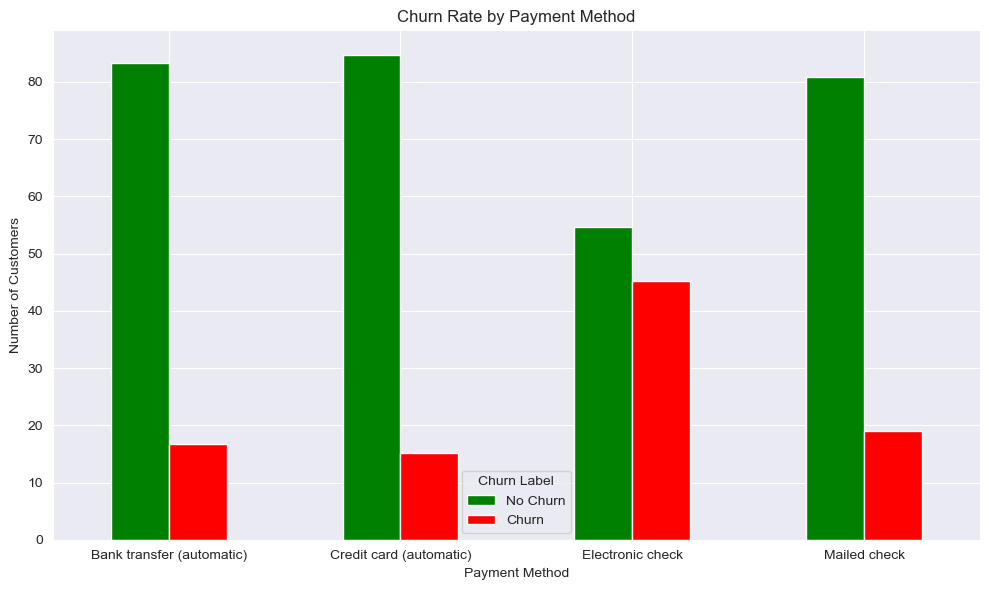

In [305]:

payment_method = telco_cust_df.groupby(['Payment Method', 'Churn Label'])['CustomerID'].count().unstack().fillna(0)

payment_method_norm = payment_method.div(payment_method.sum(axis=1), axis=0) * 100  # Convert to percentage

payment_method_norm.plot(kind='bar', color=['green', 'red'], figsize=(10, 6))
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', labels=['No Churn', 'Churn'])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

From this, we can see that for customers with Electronic check payment method, there is approximately 45% chance of churning, the highest of the other payment methods.

#### c. Perform feature engineering if necessary to derive new features.
- Here, we'll drop the columns we don't need and won't use.
- Encode categorical data using one hot encoding.
- Scale the data using StandardScaler.

In [306]:
#drop columns not needed in this analysis.
telco_cust_processed = telco_cust_df.copy() #to preserve original data.
telco_cust_processed = telco_cust_processed.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long', 'Temp_Total_Charges', 'Temp_Tenure_Product', 'Latitude','Longitude'], axis = 1)

In [307]:
telco_cust_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Here, we have removed the unnecessary columns and will now only work with the ones relevant to our analysis.

#### d. Prepare the data for unsupervised and supervised learning by standardizing numerical features and encoding categorical variables, if necessary.

In [308]:
#encode with one-hot encoding since most of the data is nominal.

categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',  'Online Security', 'Online Backup', 'Device Protection', 
                       'Tech Support', 'Streaming TV', 'Streaming Movies',  'Contract', 'Paperless Billing', 'Payment Method']

telco_cust_processed = pd.get_dummies(telco_cust_processed, columns=categorical_columns, drop_first=True)
telco_cust_processed['Churn Label'] = telco_cust_processed['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

scaler = StandardScaler()
FX = telco_cust_processed.drop('Churn Label', axis=1)
y = telco_cust_processed['Churn Label']
data_scaled = scaler.fit_transform(FX)

| Type               | Transformation applied                                                                                                                                                    |
|:-------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Numerical          | Used One-Hot Encoding to encode categorical columns into binary numerical columns since our model requires numerical input.                                               |
| Label encoding     | Used Label Encoding to encode the Churn Label column into 1 for 'Yes' and 0 for 'No' for our classification algorithm.                                                    |
| Splitting features | Split the data into feature matrix FX and target variable y.                                                                                                              |
| Feature scaling    | Scaled using Standard scaler by removing the mean so that all our features have the same scale since our models, for example, k-means, is sensitive to feature magnitude. |


## PART 3: Customer Segmentation

In [309]:
#define features (X) and target (y)
feature_matrix_X = telco_cust_processed.drop('Churn Label', axis=1)
target_result_y = telco_cust_processed['Churn Label']

#split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_X, target_result_y, test_size=0.2, random_state=42)
telco_cust_processed.sample(10)

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_Yes,...,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
4432,8,51.30,411.60,0,True,False,True,True,True,False,...,False,False,False,False,False,False,True,True,False,False
5245,31,81.15,2640.55,0,True,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2803,64,76.10,4818.80,0,True,False,True,False,True,True,...,True,True,True,False,False,True,True,False,False,False
6174,72,103.95,7517.70,0,True,False,True,True,True,True,...,True,True,False,True,False,True,False,True,False,False
1685,1,44.65,44.65,1,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True
2419,72,79.05,5730.70,0,False,False,True,False,True,True,...,False,False,False,False,False,True,False,False,False,False
1986,6,19.70,113.50,0,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3094,8,20.25,174.65,0,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3473,71,95.50,6707.15,0,True,True,True,False,True,False,...,True,True,False,True,False,True,True,True,False,False
1516,1,71.35,71.35,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


#### Determine the optimal number of clusters using appropriate techniques. Using the elbow method to find the optimal number of clusters for k-means clustering...

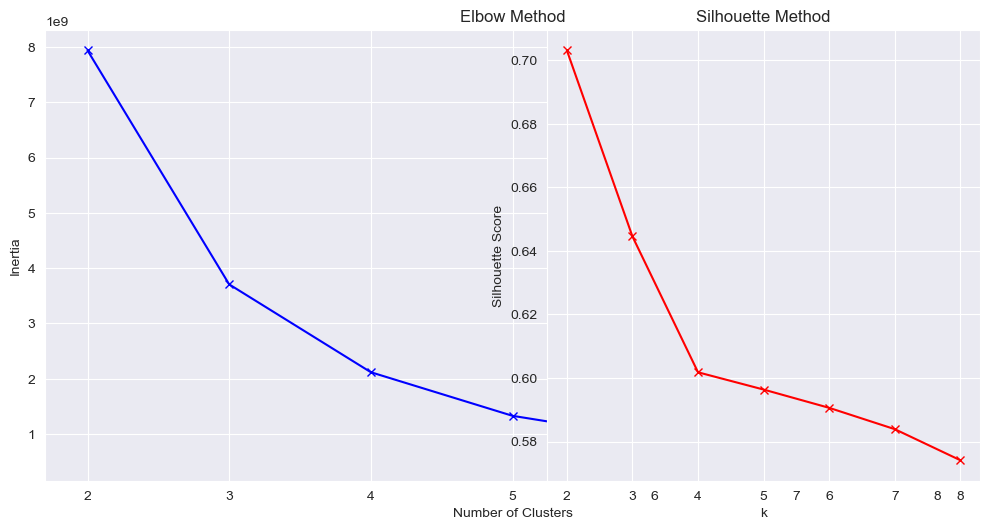

In [328]:
inertia = []
silhouette_scores = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feature_matrix_X) 
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(feature_matrix_X, kmeans.labels_))
    
#plot elbow method inertia.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), inertia, 'bx-')
plt.title('Determine Optimal Number of Cluster Using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

#plot silhouette scores.
plt.subplot(1, 2, 2)
plt.plot(range(2, 9), silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

As can be seen here, the optimal number of clusters is 3 so, we'll implement the model using 3 clusters and then visualize in 2D using dimensionality reduction. The customers will be segmented based on Tenure Months, Monthly Charges and Total Charges.

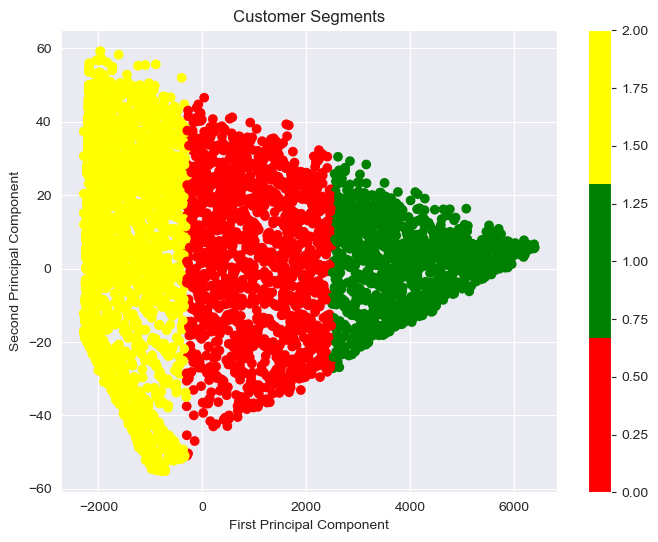

In [311]:

#perform PCA.
pca = PCA(n_components=2)

#perform K-means clustering.
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(feature_matrix_X)

feature_matrix_pca = pca.fit_transform(feature_matrix_X)
custom_colors = ListedColormap(['red', 'green', 'yellow'])

#visualize clusters in 2D using dimensionality reduction.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(feature_matrix_pca[:, 0], feature_matrix_pca[:, 1], c=cluster_labels, cmap=custom_colors)
plt.title('Customer Segments')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

Here, each dot here represents a customer, and the dots are separated into clusters based on the customer's characteristics, and from what can be observed, the clusters are reasonably well separated. The different colors represent the 3 different components; (Cluster 1, Cluster 2, Cluster 3) for yellow, red and green respectively.

#### Evaluate the clusters using appropriate metrics.

To evaluate the clusters, I'll use Silhouette Score.

In [312]:
silhouette_avg = silhouette_score(feature_matrix_X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6445577487136487


This score shows that the clusters are fairly well-separated and there is minimal overlap or ambiguity between the clusters.

#### e. Analyze and interpret the clusters based on customer characteristics or behavior, including distributions of features within each cluster.

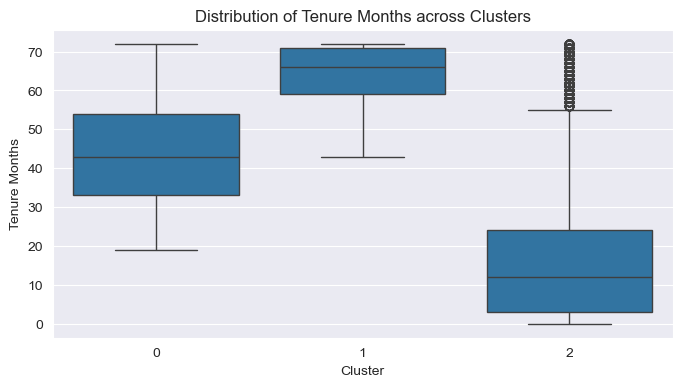

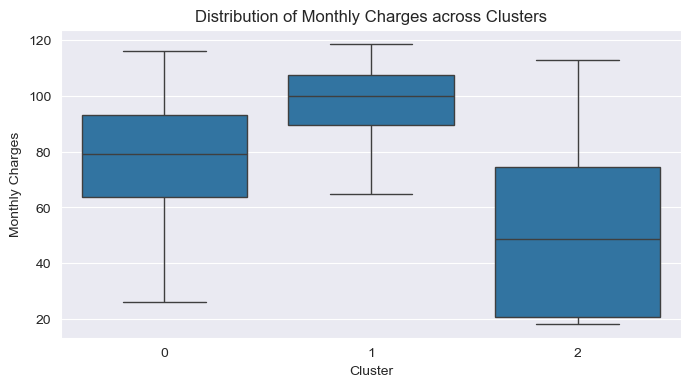

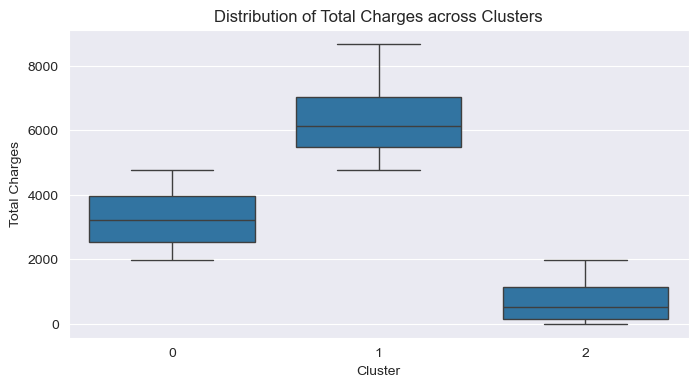

In [313]:
telco_cust_processed['Cluster'] = cluster_labels

#identify numerical columns to be used in our cluster analysis based on the column data type.
numerical_features = feature_matrix_X.select_dtypes(include=['float64', 'int64']).columns

#analyze features.
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=telco_cust_processed)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

From the above graphs, we can deduce the following insights:
#### Tenure Months
    - Cluster 0 shows that the Median Tenure is approximately 45 months with a wide distribution ranging between 20-70 months, showing relatively short tenure customers.
    - In Cluster 1, we can see the Highest median tenure of approximately 65 months with a more concentrated distribution between 40-70 months. This is typical of long term/tenure customers.
    - In Cluster 2, we see the lowest median tenure of approximately 10-15 months with a wide distributionb between 0-25 months. This suggests there is less customer engagement here.
#### Monthly Charges
    - Cluster 0 shows median charges around $80 and the charges typically between $60-$90. This is characteristic of mid-range spenders.
    - Cluster 1 shows the highest median charges of approximately $95 and the charges are concentrated in $90-$110 range. This is typical of high spenders.
    - Cluster 2 shows the lowest median charges $50 with a range from $20-$75. This represents low spenders.
    
#### Total Charges
    - Cluster 0 has its median around $3,000-$4,000.
    - Cluster 1 has the highest total charges between $5,000 and $7,000. This is evident of high spenders.
    - Cluster 2 has the lowest total spend with total charges ranging between $0 and $1,500. 
    
In general, across the 3 segments, cluster 0 is consistent with mid-range spenders. Cluster 1 shows the highest spenders and cluster 2 is consistent with low spenders. Thus, the company is advised to concentrate marketing efforts on cluster 2 as they have a high potential for churn and continue to engage cluster 2 in order to retain them as they are the highest spenders and longest staying customers.
Cluster 2 appears to have a smaller representation and cluster 1 seems to be concentrated. We'll address this imbalance using SMOTE to prevent our models from being biased towards the majority (cluster 1).


In [331]:
cluster_summary_table = telco_cust_processed.groupby('Cluster').agg({
    'Monthly Charges': 'mean',
    'Total Charges': 'mean',
    'Tenure Months': 'mean',
    'Churn Label': 'mean'
}).rename(columns={
    'Monthly Charges': 'Avg Monthly Charges',
    'Total Charges': 'Avg Total Charges',
    'Tenure Months': 'Avg Tenure',
    'Churn Label': 'Churn Rate',
})

#cluster_summary_table.columns = ['Cluster', 'Avg Monthly Charges', 'Avg Total Charges', 'Avg Tenure', 'Churn Rate']

cl_html_table = cluster_summary_table.style.format({
    'Avg Monthly Charges': '{:.2f}',
    'Avg Total Charges': '{:.2f}',
    'Avg Tenure': '{:.2f}',
    'Churn Rate': '{:.2%}' 
}).background_gradient(cmap='coolwarm').to_html()

display(HTML(cl_html_table))


,Avg Monthly Charges,Avg Total Charges,Avg Tenure,Churn Rate
Cluster,,,,
0,77.69,3272.60,44.11,22.19%
1,97.92,6292.97,64.37,13.82%
2,49.75,684.39,18.17,32.05%


This table above aligns with our earlier explanation that cluster 2 shows consistently low spend and has the highest churn, followed by cluster 0 with mid-range spend and moderate churn, then cluster 1 with the highest spend, but lowest churn.

### PART 4: Churn Prediction

Here, we are going to address class imbalance (if necessary) using appropriate techniques, then train at least two models to predict churn, optimize models using hyperparameter tuning, Evaluate models using appropriate metrics, and finally compare models to justify the selection of the final model for deployment.

In [320]:

#handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

performance_metrics = []

#train Random Forest
rf_untuned_model = RandomForestClassifier(random_state=42)
rf_untuned_model.fit(X_train, y_train)

#predict with random forest
rf_untuned_pred = rf_untuned_model.predict(X_test)
rf_untuned_pred_proba = rf_untuned_model.predict_proba(X_test)[:, 1]

#train Logistic Regression
lr_untuned_model = LogisticRegression(random_state=42, solver='liblinear', max_iter = 1000)
lr_untuned_model.fit(X_train, y_train)

#predict with Logistic Regression
lr_untuned_pred = lr_untuned_model.predict(X_test)
lr_untuned_pred_proba = lr_untuned_model.predict_proba(X_test)[:, 1]

#Hyperparameter training

#Random Forest Hyperparameter tuning parameters
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1 )

#Logistic Regression Hyperparameter tuning setup
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'] }
lr_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_param_grid, cv=5, scoring='roc_auc', n_jobs=-1 )

#train and get the best random forest model
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

#train and get the best Logistic Regression model
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_

#predict with tuned random forest
rf_tuned_pred = rf_best.predict(X_test)
rf_tuned_pred_proba = rf_best.predict_proba(X_test)[:, 1]

#predict with tuned Logistic Regression
lr_tuned_pred = lr_best.predict(X_test)
lr_tuned_pred_proba = lr_best.predict_proba(X_test)[:, 1]

def handle_model_classification_report(rf_prediction, lr_prediction, rf_pred_proba, lr_pred_proba):
    #get classification report for random forest
    rf_report = classification_report(y_test, rf_prediction, output_dict=True)
    
    #get classification report for Logistic Regression
    lr_report = classification_report(y_test, lr_prediction, output_dict=True)
    
    #calculate ROC-AUC for both models
    rf_auc = roc_auc_score(y_test, rf_pred_proba)
    lr_auc = roc_auc_score(y_test, lr_pred_proba)
    
    #convert classification reports to DataFrames
    rf_df = pd.DataFrame(rf_report).transpose()
    lr_df = pd.DataFrame(lr_report).transpose()
    
    #add model column for identification
    rf_df['Model'] = 'Random Forest'
    lr_df['Model'] = 'Logistic Regression'
    
    roc_auc_df = pd.DataFrame({ 'Model': ['Random Forest', 'Logistic Regression'], 'ROC-AUC Score': [rf_auc, lr_auc] })
    
    #combine both reports
    evaluation_df = pd.concat([rf_df, lr_df])
    
    #rearrange columns
    evaluation_df = evaluation_df.reset_index().rename(columns={'index': 'Metric'})
    evaluation_df = evaluation_df[['Model', 'Metric', 'precision', 'recall', 'f1-score']]
    
    #display the DataFrame
    print("Classification Metrics")
    c_html_table = evaluation_df.style.format({
        'precision': '{:.2f}',
        'recall': '{:.2f}',
        'f1-score': '{:.2f}'
    }).background_gradient(subset=['precision', 'recall', 'f1-score'], cmap='coolwarm').render()
    display(HTML(c_html_table))
    
    print("\nOverall ROC-AUC Scores:")
    display(roc_auc_df.style.format({ 'ROC-AUC Score': '{:.3f}' }).background_gradient(subset=['ROC-AUC Score'], cmap='coolwarm'))

print("\n Untuned model training result.")
handle_model_classification_report(rf_untuned_pred, lr_untuned_pred, rf_untuned_pred_proba, lr_untuned_pred_proba)

print("\n Tuned model training result.")
handle_model_classification_report(rf_tuned_pred, lr_tuned_pred, rf_tuned_pred_proba, lr_tuned_pred_proba)



 Untuned model training result.
Classification Metrics


,Model,Metric,precision,recall,f1-score
0,Random Forest,0,0.85,0.85,0.85
1,Random Forest,1,0.62,0.62,0.62
2,Random Forest,accuracy,0.79,0.79,0.79
3,Random Forest,macro avg,0.74,0.74,0.74
4,Random Forest,weighted avg,0.79,0.79,0.79
5,Logistic Regression,0,0.85,0.81,0.83
6,Logistic Regression,1,0.57,0.65,0.61
7,Logistic Regression,accuracy,0.76,0.76,0.76
8,Logistic Regression,macro avg,0.71,0.73,0.72
9,Logistic Regression,weighted avg,0.77,0.76,0.77



Overall ROC-AUC Scores:


,Model,ROC-AUC Score
0,Random Forest,0.829
1,Logistic Regression,0.823



 Tuned model training result.
Classification Metrics


,Model,Metric,precision,recall,f1-score
0,Random Forest,0,0.85,0.86,0.86
1,Random Forest,1,0.64,0.62,0.63
2,Random Forest,accuracy,0.79,0.79,0.79
3,Random Forest,macro avg,0.74,0.74,0.74
4,Random Forest,weighted avg,0.79,0.79,0.79
5,Logistic Regression,0,0.85,0.84,0.85
6,Logistic Regression,1,0.61,0.63,0.62
7,Logistic Regression,accuracy,0.78,0.78,0.78
8,Logistic Regression,macro avg,0.73,0.74,0.73
9,Logistic Regression,weighted avg,0.78,0.78,0.78



Overall ROC-AUC Scores:


,Model,ROC-AUC Score
0,Random Forest,0.836
1,Logistic Regression,0.837


#### Here, we learn the following insights:
- Untuned Models
    - Random Forest has the better overall performance with 0.79 accuracy.
      It has a strong prediction for non-churners (0.85 precision, recall) with moderate prediction for churners (0.62 precision, recall) with ROC-AUC of 0.829.
    - Logistic Regression has a slightly lower performance with 0.76 accuracy.
      It has good non-churn prediction (0.85 precision, 0.81 recall) with a lower churn prediction (0.57 precision, 0.65 recall) and ROC-AUC: 0.823.
- Tuned Models
    - Random Forest has a slight improvement in churn prediction (0.64 precision) and a better balanced performance and ROC-AUC improved to 0.836.
    - Logistic Regression has a significant improvement in overall performance and better balanced metrics with ROC-AUC improved to 0.837.

## PART 5: Integration of Insights

In [316]:

#add churn probabilities to the dataframe.
telco_cust_processed['Churn_Probability'] = lr_grid.predict_proba(feature_matrix_X)[:, 1]

#calculate average churn probability for each cluster.
cluster_churn_risk = telco_cust_processed.groupby('Cluster')['Churn_Probability'].mean().rename({ 'Churn_Probability': 'Churn_Probability'})
cluster_churn_risk

Cluster
0    0.244207
1    0.177940
2    0.391184
Name: Churn_Probability, dtype: float64

### Summary table of customer segments and recommended strategies

| Cluster | Characteristics                                                                                                                                      | Churn Risk | Recommended Actions                                                                                                                                                                                                                                                                     |
|:--------|:-----------------------------------------------------------------------------------------------------------------------------------------------------|:-----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0       | - Medium tenure 44 months on average. <br> Moderate monthly charges of approximately ($78) - Mid-range total charges ($3,273)<br>- 24.42% churn rate | Medium     | - Implement targeted upgrade offers with clear value propositions for them to upgrade to premium<br>- Introduce loyalty rewards for increased service adoption<br>- Conduct regular satisfaction surveys to identify their pain points<br>- Offer bundled services at competitive rates |
| 1       | - Longest tenure (64 months)<br> Highest monthly charges ($98) - Highest total charges ($6,293)<br>- Lowest churn rate (17.80%)                      | Low        | - Provide premium customer service and priority support<br>- Introduce VIP benefits and exclusive features<br>- Implement monitoring to detect when they tend towards churn<br>- Create high-value customer appreciation programs                                                       |
| 2       | - Shortest tenure (~18 months)<br> Lowest monthly charges ($50) - Lowest total charges ($684)<br>- Highest churn rate (39.11%)                       | High       | - Develop early engagement programs<br>- Offer introductory pricing with gradual increases<br>- Provide educational resources about service benefits<br>- Implement frequent check-ins and support calls<br>- Create clear upgrade paths with incentives                                |
